In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [30]:
def logistic_step(x, rate):
    """Applies a iteration step for the logistic map.

    Args:
        x (np.ndarray): Input array.
        rate (float): Rate parameter for the logistic function.

    Returns:
        np.ndarray: Transformed array after applying the logistic step function.
    """
    return rate * x * (1-x)

def logistic_map_broadcast(initial_state, rate, iterations):
    """Generates a sequence using the logistic map.

    Args:
        initial_state (np.ndarray): Initial state array.
        rate (float): Rate parameter for the logistic function.
        iterations (int): Number of iterations to perform.

    Returns:
        np.ndarray: Array containing the sequence generated by the logistic map.
    """
    states = np.empty((iterations+1, *initial_state.shape))
    states[0] = initial_state
    for i in range(1, iterations+1):
        states[i] = logistic_step(states[i-1], rate)
    return states

def logistic_map_nobroadcast(initial_state, rate, iterations):
    """Generates a sequence using the logistic map.

    Args:
        initial_state (np.ndarray): Initial state array.
        rate (float): Rate parameter for the logistic function.
        iterations (int): Number of iterations to perform.

    Returns:
        np.ndarray: Array containing the sequence generated by the logistic map.
    """
    state = initial_state[:]
    for i in range(iterations):
        state = logistic_step(state, rate)
    return state


def plot_logistic_map(states, rates, kwargs_scatter=None, save_pdf=False):

    rates_expanded = rates * np.full_like(states, 1.)

    plt.figure(figsize=(20, 12))
    plt.scatter(rates_expanded.flatten(), states.flatten(), **kwargs_scatter)
    plt.xlabel('rate')
    plt.ylabel('state values')
    plt.grid()
    if save_pdf:
        plt.savefig("logistic_map.pdf", format="pdf")
    plt.show()

In [48]:
rates = np.concatenate([np.linspace(2.5, 3.55, 5000), np.linspace(3.55, 4.0, 1000)])
initial_state = np.full_like(rates, .3)

temp_state = logistic_map_nobroadcast(initial_state, rates, 200)
final_steps = logistic_map_broadcast(temp_state, rates, 30)

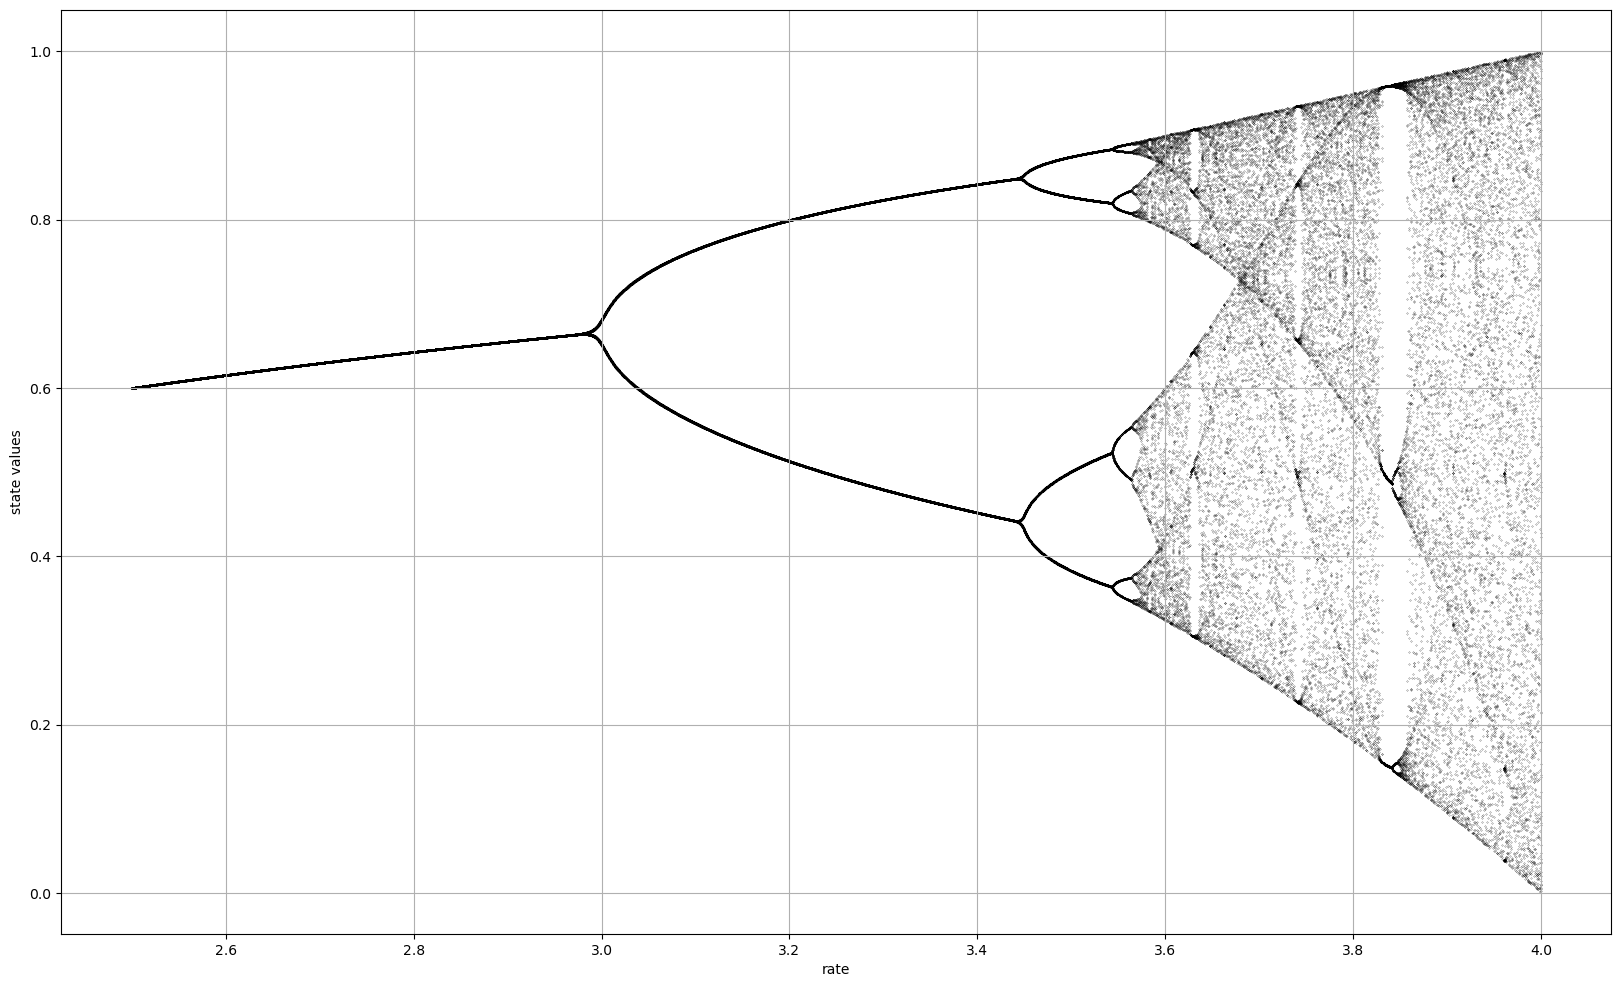

In [50]:
plot_logistic_map(final_steps, rates, kwargs_scatter={"s": 0.03, "color": "black", "marker": "o", "edgecolor": None}, save_pdf=True)

array([2.5       , 2.50210421, 2.50420842, ..., 3.9993996 , 3.9996998 ,
       4.        ])